# Task 1
1. Create a graph network between mol_i and mol_j
2. Edge use e-coupling value and distance
3. Edge length can be proportional to distance

### Started with getting nodes from npt-HK4.gro file

In [147]:
# imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


# read npt-HK4.gro file
def read_gro_file(filename):
    with open(filename, "r") as f:
        # read title line
        title = f.readline().strip()

        # Read number of atoms
        num_atoms = int(f.readline().strip())

        atoms_data = []
        previous_atom_id = 0
        for _ in range(num_atoms):
            line = f.readline().rstrip()

            # Parsing info
            res_id = int(line[0:5])
            res_name = line[5:8].strip()
            atom_name = line[12:15].strip()

            atom_id = int(line[15:20].strip())
            # Problem: after atom id 99999, it reverts back to 0. The following solves this:
            if previous_atom_id >= 99999:
                atom_id = previous_atom_id + 1
            previous_atom_id = atom_id

            x = float(line[20:28].strip())
            y = float(line[28:36].strip())
            z = float(line[36:44].strip())

            atoms_data.append(
                {
                    "res_id": res_id,
                    "res_name": res_name,
                    "atom_name": atom_name,
                    "atom_id": atom_id,
                    "x": x,
                    "y": y,
                    "z": z,
                }
            )

        # Read box dimensions
        box_line = f.readline().strip().split()

        box_x = float(box_line[0])
        box_y = float(box_line[1])
        box_z = float(box_line[2])

    return title, num_atoms, atoms_data, (box_x, box_y, box_z)


title, num_atoms, atoms, box = read_gro_file(
    "C:/Users/user/OneDrive/Documents/intern-stuff/git/kmc-charge-transport-organic-semiconductor/data/npt-HK4.gro"
)

print(f"Title: {title}")
print(f"Number of atoms: {num_atoms}")
print(f"99999th atom: {atoms[99998]}")
print(f"10000th atom: {atoms[99999]}")
print(f"10001th atom: {atoms[100000]}")
print(f"Box Dimensions: {box}")

Title: mol only system in water
Number of atoms: 126084
99999th atom: {'res_id': 1191, 'res_name': 'HK4', 'atom_name': 'C13', 'atom_id': 99999, 'x': 1.262, 'y': 5.595, 'z': 5.683}
10000th atom: {'res_id': 1191, 'res_name': 'HK4', 'atom_name': 'H6', 'atom_id': 100000, 'x': 1.329, 'y': 5.673, 'z': 5.723}
10001th atom: {'res_id': 1191, 'res_name': 'HK4', 'atom_name': 'C7', 'atom_id': 100001, 'x': 1.056, 'y': 5.248, 'z': 5.556}
Box Dimensions: (11.24798, 11.24798, 11.24798)


### Created nodes and plotted nodes only graph

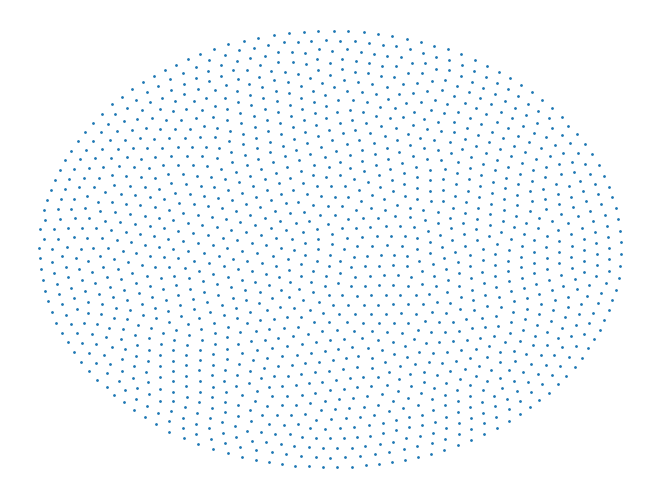

In [148]:
# Creating nodes
G = nx.Graph()

unique_res_id = set(d["res_id"] for d in atoms)

G.add_nodes_from(unique_res_id)

nx.draw(G, with_labels=False, font_weight="bold", node_size=1)

### Got edges from e-coupling_with_nn_distance.txt file. 
- Define G as graph with all molecules as nodes
- Define H as graph with only molecules that have non-zero degree
- Define I as graph of longest chain network

In [149]:
data = np.loadtxt(
    "C:/Users/user/OneDrive/Documents/intern-stuff/git/kmc-charge-transport-organic-semiconductor/data/e-coupling_with_nn_distance.txt",
    delimiter="\t",
    skiprows=1,
)

mol_i, mol_j_nearest, extracted_value, Distance_nm, NN_Distance_nm = zip(*data)
pairs = list(zip(mol_i, mol_j_nearest))

G.add_edges_from(pairs)
for i, (u, v) in enumerate(pairs):
    G[u][v]["extracted_value"] = extracted_value[i]
    G[u][v]["weight"] = Distance_nm[i]

H = nx.Graph()
H.add_edges_from(pairs)
for i, (u, v) in enumerate(pairs):
    H[u][v]["extracted_value"] = extracted_value[i]
    H[u][v]['weight'] = Distance_nm[i]

adj = dict(H.adjacency())

longest_network_nodes = max(nx.connected_components(G), key=len)

longest_network = {key: adj[key] for key in longest_network_nodes}

I = nx.Graph(longest_network)

print(f"Is G a connected graph?: {nx.is_connected(G)}")
print(f"Is H a connected graph?: {nx.is_connected(H)}")

Is G a connected graph?: False
Is H a connected graph?: False


### Plotted Graph G, H and I
- Define G as graph with all molecules as nodes
- Define H as graph with only molecules that have non-zero degree
- Define I as graph of longest chain network

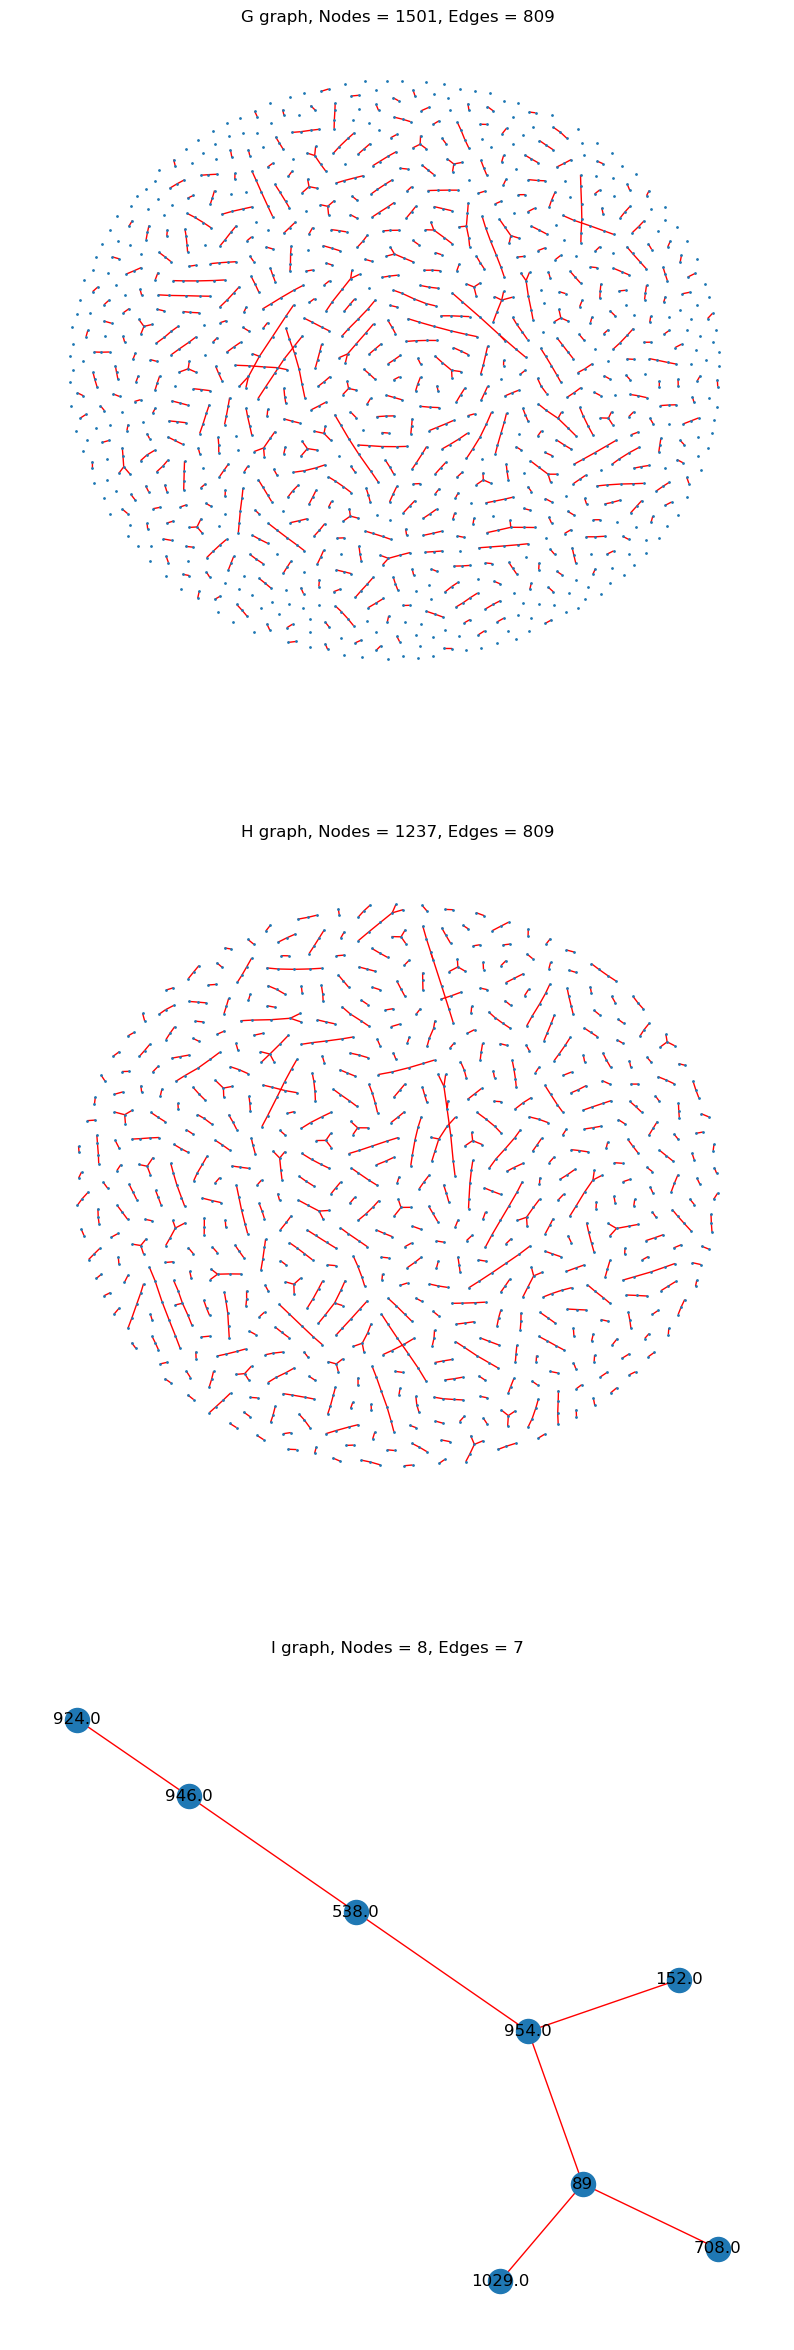

In [150]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))
nx.planar_layout(G)
nx.planar_layout(H)
nx.planar_layout(I)
nx.draw(G, ax=axes[0], with_labels=False, node_size=1, edge_color="red")
nx.draw(H, ax=axes[1], with_labels=False, node_size=1, edge_color="red")
nx.draw(I, ax=axes[2], with_labels=True, node_size=300, edge_color="red")

axes[0].title.set_text(f"G graph, Nodes = {G.number_of_nodes()}, Edges = {G.number_of_edges()}")
axes[1].title.set_text(f"H graph, Nodes = {H.number_of_nodes()}, Edges = {H.number_of_edges()}")
axes[2].title.set_text(f"I graph, Nodes = {I.number_of_nodes()}, Edges = {I.number_of_edges()}")